### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/xKatyJane/Web_scraping-Property_data_analysis/refs/heads/main/Data/Property_data_idealista_20-02-2025.csv")

### Inspecting the data

In [3]:
df.shape

(4579, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                4579 non-null   object 
 1   Price_EUR_per_month  4579 non-null   float64
 2   Neighbourhood        4579 non-null   object 
 3   Person               4579 non-null   object 
 4   Number_of_rooms      4337 non-null   float64
 5   Square_meters        4579 non-null   float64
 6   Exterior_interior    4189 non-null   object 
 7   Floor                4092 non-null   object 
 8   Lift                 4405 non-null   float64
 9   Garage               628 non-null    object 
dtypes: float64(4), object(6)
memory usage: 357.9+ KB


In [5]:
df.dtypes

Title                   object
Price_EUR_per_month    float64
Neighbourhood           object
Person                  object
Number_of_rooms        float64
Square_meters          float64
Exterior_interior       object
Floor                   object
Lift                   float64
Garage                  object
dtype: object

In [6]:
df.isnull().sum()

Title                     0
Price_EUR_per_month       0
Neighbourhood             0
Person                    0
Number_of_rooms         242
Square_meters             0
Exterior_interior       390
Floor                   487
Lift                    174
Garage                 3951
dtype: int64

#### Handling the missing values

In [7]:
#Replacing values in three columns
df['Garage'] = df['Garage'].fillna('No garage')
df['Exterior_interior'] = df['Exterior_interior'].replace({1: 'Yes', 0: 'No'}).fillna('Unknown')
df['Lift'] = df['Lift'].replace({1: 'Yes', 0: 'No'}).fillna('Unknown')

#Assigning numeric values to floors and transforming to float
df['Floor'] = df['Floor'].replace({"Bajo": 0, "Entreplanta": 0.5})
df['Floor'] = df['Floor'].astype(float)

#### Creating a new column (Price per square meter)

In [8]:
df['Price_per_square_m'] = df['Price_EUR_per_month'] / df['Square_meters']

#### Checking the data after changes

In [9]:
df.isnull().sum()

Title                    0
Price_EUR_per_month      0
Neighbourhood            0
Person                   0
Number_of_rooms        242
Square_meters            0
Exterior_interior        0
Floor                  487
Lift                     0
Garage                   0
Price_per_square_m       0
dtype: int64

<code style="color: #9900FF">"Floor" and "Number of rooms" columns have NaNs. I want to keep these columns as numeric values, so I am not replacing those.</code>

In [10]:
df.dtypes

Title                   object
Price_EUR_per_month    float64
Neighbourhood           object
Person                  object
Number_of_rooms        float64
Square_meters          float64
Exterior_interior       object
Floor                  float64
Lift                    object
Garage                  object
Price_per_square_m     float64
dtype: object

In [11]:
df.head()

,Title,Price_EUR_per_month,Neighbourhood,Person,Number_of_rooms,Square_meters,Exterior_interior,Floor,Lift,Garage,Price_per_square_m
0,Alquiler de Piso en calle de Morales,1400.0,"Les Corts, Barcelona",Profesional,1.0,50.0,exterior,0.0,No,No garage,28.000000
1,Alquiler de Piso en calle de Loreto,3000.0,"Les Corts, Barcelona",Profesional,2.0,254.0,exterior,7.0,Yes,No garage,11.811024
2,Alquiler de Piso en calle de la Riera Blanca,1500.0,"La Maternitat i Sant Ramon, Barcelona",Profesional,2.0,71.0,exterior,4.0,Yes,No garage,21.126761
3,Alquiler de Piso en Passatge d'Albert Pinyol,1250.0,"Les Corts, Barcelona",Profesional,1.0,45.0,exterior,1.0,Yes,No garage,27.777778
4,Alquiler de Ático en calle de l'Alfambra,1795.0,"Pedralbes, Barcelona",Profesional,2.0,70.0,exterior,6.0,Yes,No garage,25.642857


### Checking the values distribution

#### Price

In [12]:
df.Price_EUR_per_month.value_counts()

Price_EUR_per_month
2500.0    186
1800.0    123
1500.0    107
1600.0    100
3500.0     97
         ... 
2890.0      1
2575.0      1
1781.0      1
3565.0      1
965.0       1
Name: count, Length: 635, dtype: int64

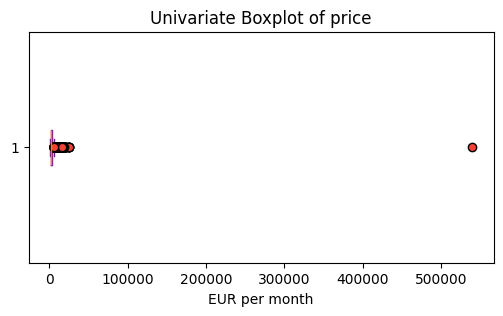

In [13]:
plt.figure(figsize=(6, 3))
plt.boxplot(df['Price_EUR_per_month'], vert=False,
            boxprops=dict(color='#6a1b9a'),
            whiskerprops=dict(color='#6a1b9a'),
            capprops=dict(color='#6a1b9a'),
            flierprops=dict(markerfacecolor='#f44336', marker='o')
            )
plt.title('Univariate Boxplot of price')
plt.xlabel('EUR per month')
plt.show()

<code style="color : purple">There is an outlier. Finding its value and removing it.</code>

In [14]:
price_outlier = df['Price_EUR_per_month'].max()
print(price_outlier)

540000.0


In [15]:
df.drop(df[df['Price_EUR_per_month'] == price_outlier].index, inplace=True)

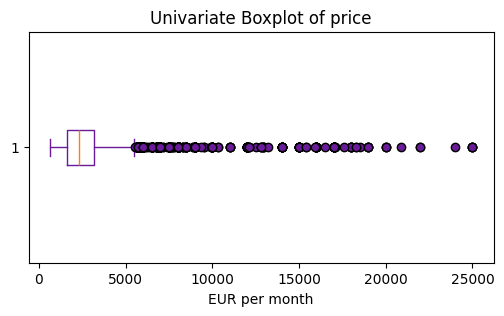

In [16]:
plt.figure(figsize=(6, 3))
plt.boxplot(df['Price_EUR_per_month'], vert=False,
            boxprops=dict(color='#6a1b9a'),
            whiskerprops=dict(color='#6a1b9a'),
            capprops=dict(color='#6a1b9a'),
            flierprops=dict(markerfacecolor='#6a1b9a', marker='o')
            )
plt.title('Univariate Boxplot of price')
plt.xlabel('EUR per month')
plt.show()

<code style="color : #9900FF">The remaining values seem to be correct.</code>

#### Number of rooms

In [17]:
df.Number_of_rooms.value_counts()

Number_of_rooms
2.0     1773
1.0     1070
3.0     1002
4.0      333
5.0      105
6.0       30
7.0       14
9.0        5
10.0       4
Name: count, dtype: int64

#### Square meters

In [18]:
df.Square_meters.value_counts()

Square_meters
70.0     190
60.0     169
80.0     166
90.0     155
65.0     155
        ... 
421.0      1
611.0      1
382.0      1
195.0      1
147.0      1
Name: count, Length: 303, dtype: int64

#### Floor number

In [19]:
df.Floor.value_counts()

Floor
 1.0     887
 2.0     748
 3.0     695
 4.0     500
 5.0     336
 0.0     239
 0.5     234
 6.0     185
 7.0     116
 8.0      57
 9.0      25
 10.0     17
 11.0      6
 19.0      6
 12.0      5
 18.0      5
 25.0      5
 20.0      5
 16.0      4
 22.0      4
 15.0      3
 14.0      3
 13.0      2
 17.0      1
 26.0      1
-1.0       1
-2.0       1
Name: count, dtype: int64

In [20]:
unique_neighbourhoods = df['Floor'].unique()
print(unique_neighbourhoods)

[ 0.   7.   4.   1.   6.   8.   nan  2.  12.   9.   0.5 10.   5.   3.
 13.  15.  16.  18.  25.  22.  14.  19.  20.  26.  17.  11.  -1.  -2. ]


#### Professional vs personal rentals

In [21]:
df.Person.value_counts()

Person
Profesional    4279
Particular      299
Name: count, dtype: int64

#### External vs internal apartments

In [22]:
df.Exterior_interior.value_counts()

Exterior_interior
exterior    3849
Unknown      390
interior     339
Name: count, dtype: int64

#### Garage

In [23]:
df.Garage.value_counts()

Garage
No garage          3950
Garage included     445
Garage optional     183
Name: count, dtype: int64

#### Neigbourhoods

In [24]:
df.Neighbourhood.value_counts()

Neighbourhood
La Dreta de l'Eixample, Barcelona                    633
Sant Pere - Santa Caterina i la Ribera, Barcelona    351
El Raval, Barcelona                                  328
El Gòtic, Barcelona                                  286
Eixample, Barcelona                                  222
                                                    ... 
La Vall d'Hebron - La Clota, Barcelona                 3
Horta, Barcelona                                       3
Porta, Barcelona                                       3
La Font d'En Fargues, Barcelona                        2
Les Roquetes, Barcelona                                2
Name: count, Length: 67, dtype: int64

In [25]:
#Splitting the neighbourhood into "Neighbourhood" and "City" columns
df[['Neighbourhood', 'City']] = df['Neighbourhood'].str.split(',', expand=True)

In [26]:
#Checking unique neighbourhood names
unique_neighbourhoods = df['Neighbourhood'].unique()
print(unique_neighbourhoods)

['Les Corts' 'La Maternitat i Sant Ramon' 'Pedralbes' 'La Sagrera'
 'El Congrés i els Indians' 'Sant Andreu' 'Navas' 'Sant Martí'
 'El Poblenou' 'El Parc i la Llacuna del Poblenou' 'La Verneda i la Pau'
 'Diagonal Mar i el Front Marítim del Poblenou'
 "El Camp de l'Arpa del Clot" 'El Clot' 'El Besòs'
 'Provençals del Poblenou' 'La Vila Olímpica del Poblenou'
 'Sant Martí de Provençals' 'Sant Gervasi - Galvany' 'Sarrià'
 'Sarrià-Sant Gervasi' 'El Putxet i el Farró' 'Sant Gervasi - La Bonanova'
 'Les Tres Torres' 'Vallvidrera - El Tibidabo i les Planes'
 'El Fort Pienc' "L'Antiga Esquerra de l'Eixample"
 "La Dreta de l'Eixample" 'Sant Antoni' 'La Sagrada Família' 'Eixample'
 "La Nova Esquerra de l'Eixample" 'Porta' 'Nou Barris' 'La Prosperitat'
 'Can Peguera - El Turó de la Peira' 'Vilapicina i la Torre Llobeta'
 'Les Roquetes' 'Vila de Gràcia' "El Camp d'En Grassot i Gràcia Nova"
 'La Salut' 'Gràcia' 'Vallcarca i els Penitents' 'Horta Guinardó'
 'El Baix Guinardó' 'El Guinardó' 'La Teix

<code style="color : #9900FF">There is a large number of unique neighbourhoods, which can be grouped into 10 main neighbourhoods.</code>

In [27]:
def categorize_neighbourhood(Neighbourhood):
    if Neighbourhood in ["Les Corts", "La Maternitat i Sant Ramon", "Pedralbes"]:
        return "Les Corts"
    elif Neighbourhood in ["La Sagrera", "El Congrés i els Indians", "Sant Andreu", "Navas"]:
        return "Sant Andreu"
    elif Neighbourhood in ["Sant Martí", "El Poblenou", "El Parc i la Llacuna del Poblenou", "La Verneda i la Pau", "Diagonal Mar i el Front Marítim del Poblenou", "El Camp de l'Arpa del Clot", "El Clot", "El Besòs", "Provençals del Poblenou", "La Vila Olímpica del Poblenou", "Sant Martí de Provençals"]:
        return "Sant Martí"
    elif Neighbourhood in ["Sant Gervasi - Galvany", "Sarrià", "Sarrià-Sant Gervasi", "El Putxet i el Farró", "Sant Gervasi - La Bonanova", "Les Tres Torres", "Vallvidrera - El Tibidabo i les Planes"]:
        return "Sarrià-Sant Gervasi"
    elif Neighbourhood in ["El Fort Pienc", "L'Antiga Esquerra de l'Eixample", "La Dreta de l'Eixample", "Sant Antoni", "La Sagrada Família", "Eixample", "La Nova Esquerra de l'Eixample"]:
        return "Eixample"
    elif Neighbourhood in ["Porta", "Nou Barris", "La Prosperitat", "Can Peguera - El Turó de la Peira", "Vilapicina i la Torre Llobeta", "Les Roquetes"]:
        return "Nou Barris"
    elif Neighbourhood in ["Vila de Gràcia", "El Camp d'En Grassot i Gràcia Nova", "La Salut", "Gràcia", "Vallcarca i els Penitents"]:
        return "Gràcia"
    elif Neighbourhood in ["Horta Guinardó", "El Baix Guinardó", "El Guinardó", "La Teixonera", "El Carmel", "Can Baró", "Horta", "La Font d'En Fargues", "Sant Genís Dels Agudells - Montbau", "La Vall d'Hebron - La Clota"]:
        return "Horta Guinardó"
    elif Neighbourhood in ["Sant Pere - Santa Caterina i la Ribera", "Ciutat Vella", "La Barceloneta", "El Raval", "El Gòtic"]:
        return "Ciutat Vella"
    elif Neighbourhood in ["El Poble Sec - Parc de Montjuïc", "Sants", "Sants-Montjuïc", "Sants - Badal", "La Font de la Guatlla", "La Bordeta", "Hostafrancs", "La Marina del Prat Vermell", "La Marina del Port"]:
        return "Sants-Montjuïc"

df["Neighbourhood_main"] = df["Neighbourhood"].apply(categorize_neighbourhood)

In [28]:
df.Neighbourhood_main.value_counts()

Neighbourhood_main
Eixample               1466
Ciutat Vella           1251
Sarrià-Sant Gervasi     573
Sant Martí              384
Gràcia                  333
Sants-Montjuïc          242
Les Corts               153
Horta Guinardó           85
Sant Andreu              60
Nou Barris               31
Name: count, dtype: int64

In [29]:
unique_main_neighbourhoods = df['Neighbourhood_main'].unique()
print(unique_main_neighbourhoods)

['Les Corts' 'Sant Andreu' 'Sant Martí' 'Sarrià-Sant Gervasi' 'Eixample'
 'Nou Barris' 'Gràcia' 'Horta Guinardó' 'Ciutat Vella' 'Sants-Montjuïc']


In [30]:
df.City.value_counts()

City
Barcelona    4578
Name: count, dtype: int64

#### Lift

In [31]:
df.Lift.value_counts()

Lift
Yes        3572
No          832
Unknown     174
Name: count, dtype: int64

In [32]:
df.head()

,Title,Price_EUR_per_month,Neighbourhood,Person,Number_of_rooms,Square_meters,Exterior_interior,Floor,Lift,Garage,Price_per_square_m,City,Neighbourhood_main
0,Alquiler de Piso en calle de Morales,1400.0,Les Corts,Profesional,1.0,50.0,exterior,0.0,No,No garage,28.000000,Barcelona,Les Corts
1,Alquiler de Piso en calle de Loreto,3000.0,Les Corts,Profesional,2.0,254.0,exterior,7.0,Yes,No garage,11.811024,Barcelona,Les Corts
2,Alquiler de Piso en calle de la Riera Blanca,1500.0,La Maternitat i Sant Ramon,Profesional,2.0,71.0,exterior,4.0,Yes,No garage,21.126761,Barcelona,Les Corts
3,Alquiler de Piso en Passatge d'Albert Pinyol,1250.0,Les Corts,Profesional,1.0,45.0,exterior,1.0,Yes,No garage,27.777778,Barcelona,Les Corts
4,Alquiler de Ático en calle de l'Alfambra,1795.0,Pedralbes,Profesional,2.0,70.0,exterior,6.0,Yes,No garage,25.642857,Barcelona,Les Corts


In [33]:
df.shape

(4578, 13)

In [34]:
df.dtypes

Title                   object
Price_EUR_per_month    float64
Neighbourhood           object
Person                  object
Number_of_rooms        float64
Square_meters          float64
Exterior_interior       object
Floor                  float64
Lift                    object
Garage                  object
Price_per_square_m     float64
City                    object
Neighbourhood_main      object
dtype: object

In [35]:
df.columns.tolist()

['Title',
 'Price_EUR_per_month',
 'Neighbourhood',
 'Person',
 'Number_of_rooms',
 'Square_meters',
 'Exterior_interior',
 'Floor',
 'Lift',
 'Garage',
 'Price_per_square_m',
 'City',
 'Neighbourhood_main']

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price_EUR_per_month,4578.0,2926.818698,2461.733405,630.000000,1650.0,2300.000000,3200.000000,25000.0
Number_of_rooms,4336.0,2.269834,1.112402,1.000000,2.0,2.000000,3.000000,10.0
Square_meters,4578.0,97.441241,76.969270,14.000000,60.0,79.000000,109.000000,968.0
Floor,4091.0,2.908335,2.597447,-2.000000,1.0,2.000000,4.000000,26.0
Price_per_square_m,4578.0,32.080548,14.409818,6.198347,23.0,28.947368,36.923077,160.0


In [37]:
df.describe(include='object').T

,count,unique,top,freq
Title,4578,1910,Alquiler de Piso en La Dreta de l'Eixample,119
Neighbourhood,4578,67,La Dreta de l'Eixample,633
Person,4578,2,Profesional,4279
Exterior_interior,4578,3,exterior,3849
Lift,4578,3,Yes,3572
Garage,4578,3,No garage,3950
City,4578,1,Barcelona,4578
Neighbourhood_main,4578,10,Eixample,1466


### Univariate Analysis

#### Price

Mean:2926.82
Median:2300.0
Mode:2500.0


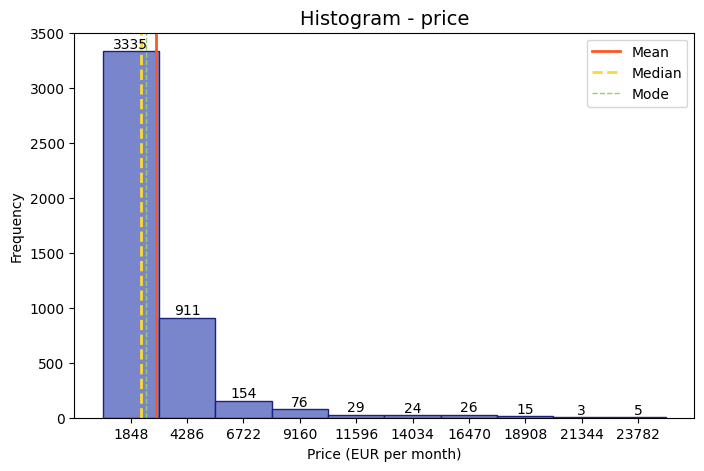

In [38]:
#The graph size
plt.figure(figsize=(8, 5))
values, bins, bars = plt.hist(df['Price_EUR_per_month'], color='#7986cb', edgecolor='#1a237e')

#Plotting the annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

#Mean, median and mode
mean = df['Price_EUR_per_month'].mean()
median = df['Price_EUR_per_month'].median()
mode = df['Price_EUR_per_month'].mode()[0]

plt.axvline(mean, color='#ff5722', linewidth=2,label='Mean')
plt.axvline(median, color='#fdd835', linewidth=2, linestyle='dashed', label='Median')
plt.axvline(mode, color='#9ccc65', linewidth=1, linestyle='dashed', label='Mode')

#Labels
plt.title('Histogram - price', fontsize=14)
plt.xlabel('Price (EUR per month)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers)
plt.legend(loc=1)

print(f'Mean:{round(mean,2)}\nMedian:{round(median,2)}\nMode:{round(mode,2)}')

Text(0.5, 0, 'Price')

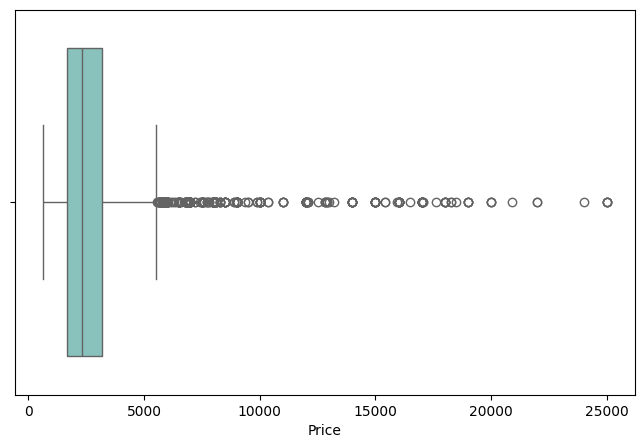

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Price_EUR_per_month"], color="#80cbc4")
plt.xlabel("Price")

<code style="color: #9900FF">The price of most of the apartments is in the lower range of the plot. The mean apartment price is 2927 EUR per month but there is a number of outliers, with prices between 5000 - 25000 EUR per month.</code>

#### Number of rooms

Mean:2.27
Median:2.0
Mode:2.0


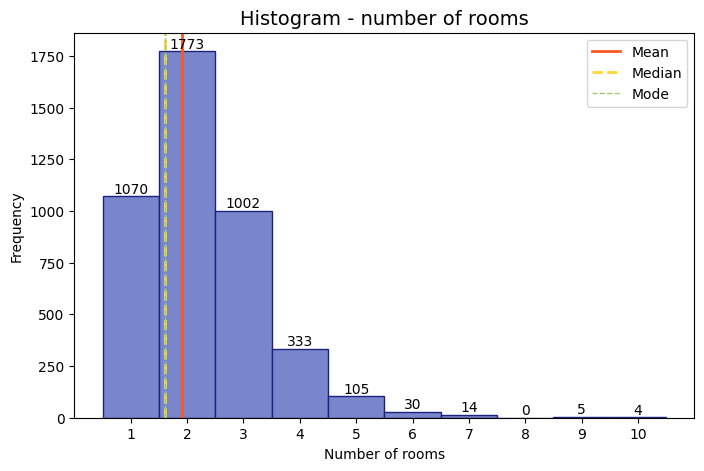

In [40]:
#Converting values to numeric and ignoring the unknowns (NaNs)
df['Number_of_rooms'] = pd.to_numeric(df['Number_of_rooms'], errors='coerce')

#The graph size
plt.figure(figsize=(8, 5))
values, bins, bars = plt.hist(df['Number_of_rooms'].dropna(), color='#7986cb', edgecolor='#1a237e')

#Plotting the annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

#Mean, median and mode
mean = df['Number_of_rooms'].mean()
median = df['Number_of_rooms'].median()
mode = df['Number_of_rooms'].mode()[0]

plt.axvline(mean, color='#ff5722', linewidth=2,label='Mean')
plt.axvline(median, color='#fdd835', linewidth=2, linestyle='dashed', label='Median')
plt.axvline(mode, color='#9ccc65', linewidth=1, linestyle='dashed', label='Mode')

#Labels
plt.title('Histogram - number of rooms', fontsize=14)
plt.xlabel('Number of rooms', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
bin_centers = (bins[:-1] + bins[1:]) / 2
plt.xticks(bin_centers, np.arange(1, 11))
plt.legend(loc=1)

print(f'Mean:{round(mean,2)}\nMedian:{round(median,2)}\nMode:{round(mode,2)}')

Text(0.5, 0, 'Number of rooms')

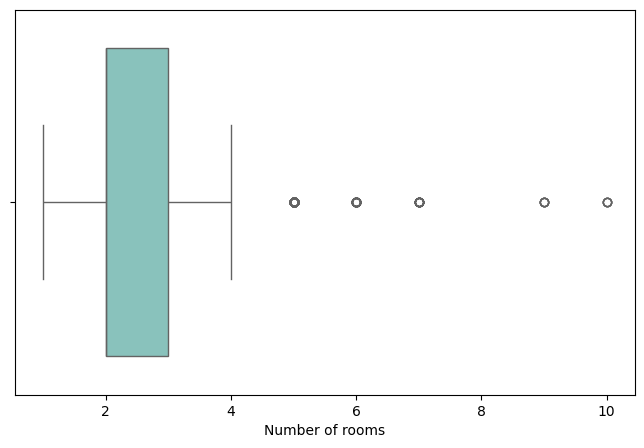

In [41]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Number_of_rooms"], color="#80cbc4")
plt.xlabel("Number of rooms")

<code style="color: #9900FF">Most of the apartments have two rooms, as this is the bin with the highest number of apartments. One room and three rooms are the second and third most popular, respectively. There is a number of "outliers" with 5 - 10 rooms.</code>

#### Square meters

Mean:97.44
Median:79.0
Mode:70.0


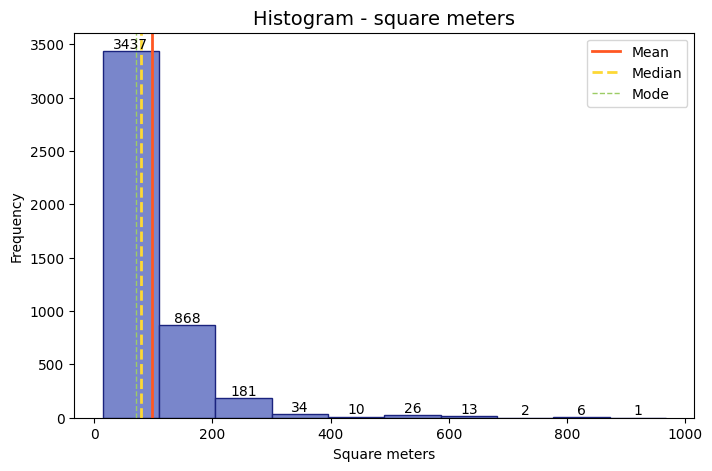

In [42]:
plt.figure(figsize=(8, 5))
values, bins, bars = plt.hist(df['Square_meters'], color='#7986cb', edgecolor='#1a237e')

#Plotting the annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

#Mean, median and mode
mean = df['Square_meters'].mean()
median = df['Square_meters'].median()
mode = df['Square_meters'].mode()[0]

plt.axvline(mean, color='#ff5722', linewidth=2,label='Mean')
plt.axvline(median, color='#fdd835', linewidth=2, linestyle='dashed', label='Median')
plt.axvline(mode, color='#9ccc65', linewidth=1, linestyle='dashed', label='Mode')

#Labels
plt.title('Histogram - square meters', fontsize=14)
plt.xlabel('Square meters', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(loc=1)

print(f'Mean:{round(mean,2)}\nMedian:{round(median,2)}\nMode:{round(mode,2)}')

Text(0.5, 0, 'Square meters')

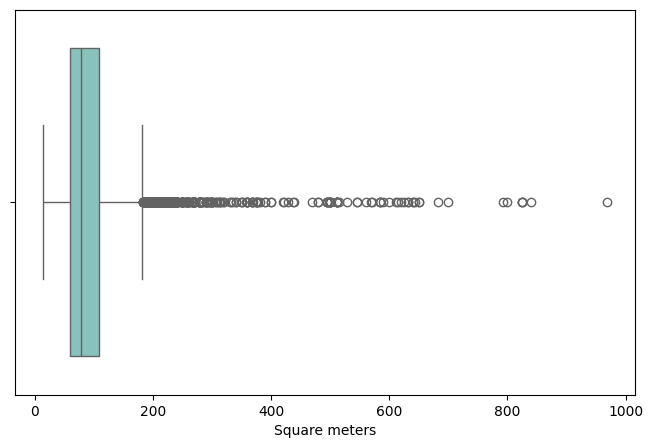

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Square_meters"], color="#80cbc4")
plt.xlabel("Square meters")

<code style="color: #9900FF">Most apartments have less than 100 square meters. The average size is 97.5 square meters. There is a number of "outliers" with higher size, 200 - 1000 square meters.</code>

Mean:2.91
Median:2.0
Mode:1.0


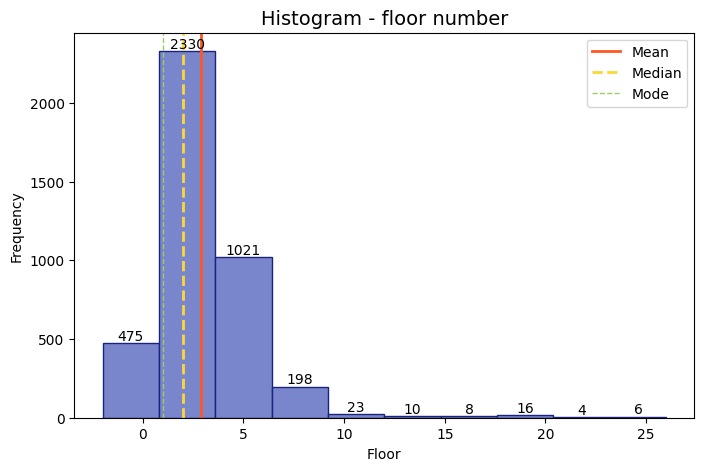

In [44]:
plt.figure(figsize=(8, 5))
values, bins, bars = plt.hist(df['Floor'], color='#7986cb', edgecolor='#1a237e')

#Plotting the annotations
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=10)

#Mean, median and mode
mean = df['Floor'].mean()
median = df['Floor'].median()
mode = df['Floor'].mode()[0]

plt.axvline(mean, color='#ff5722', linewidth=2,label='Mean')
plt.axvline(median, color='#fdd835', linewidth=2, linestyle='dashed', label='Median')
plt.axvline(mode, color='#9ccc65', linewidth=1, linestyle='dashed', label='Mode')

#Labels
plt.title('Histogram - floor number', fontsize=14)
plt.xlabel('Floor', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
#bin_centers = (bins[:-1] + bins[1:]) / 2
#plt.xticks(bin_centers)
plt.legend(loc=1)

print(f'Mean:{round(mean,2)}\nMedian:{round(median,2)}\nMode:{round(mode,2)}')

Text(0.5, 0, 'Floor')

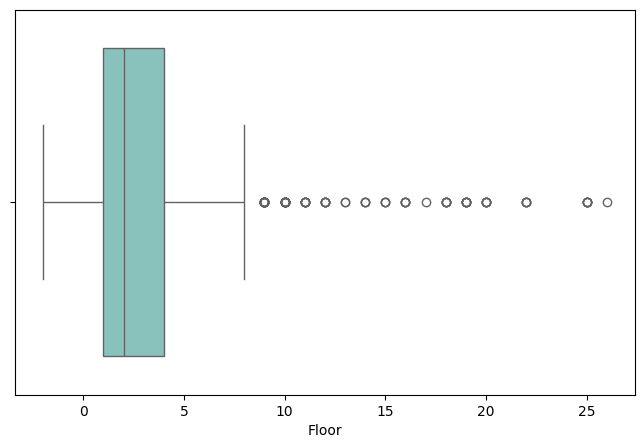

In [45]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Floor"], color="#80cbc4")
plt.xlabel("Floor")

<code style="color: #9900FF">Most apartments are located on lower floors, with 2.91 being the average.</code>

### Analysis of the categorical data

#### Professional vs private rentals

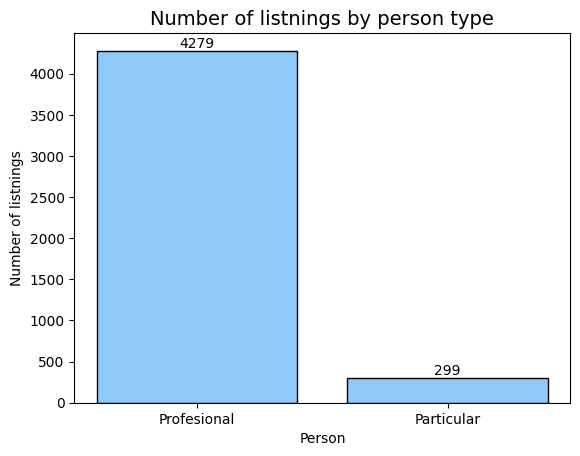

In [46]:
listing_counts = df['Person'].value_counts()
bars = plt.bar(listing_counts.index, listing_counts.values, color='#90caf9', edgecolor='#000000')

plt.title('Number of listnings by person type', fontsize=14)
plt.xlabel('Person', fontsize=10)
plt.ylabel('Number of listnings', fontsize=10)
plt.bar_label(bars)
plt.show()

<code style="color: #9900FF">Majority of the rentals are advertised by the real estate agencies, not by the private owners.</code>

#### Number of listings per neighbourhood

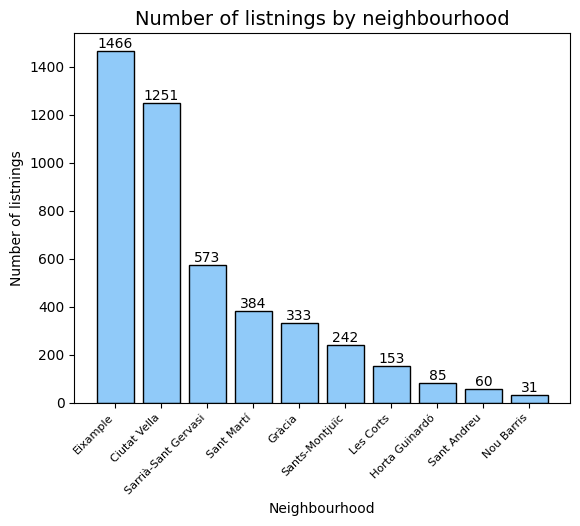

In [47]:
neighbourhood_counts = df['Neighbourhood_main'].value_counts()
bars = plt.bar(neighbourhood_counts.index, neighbourhood_counts.values, color='#90caf9', edgecolor='#000000')

plt.title('Number of listnings by neighbourhood', fontsize=14)
plt.xlabel('Neighbourhood', fontsize=10)
plt.ylabel('Number of listnings', fontsize=10)
plt.bar_label(bars)
plt.xticks(size='8', rotation=45,ha='right')
plt.show()

<code style="color: #9900FF">Most of the advertised apartments are located in the Eixample and Ciutat Vella.</code>

#### Interior vs exterior apartments

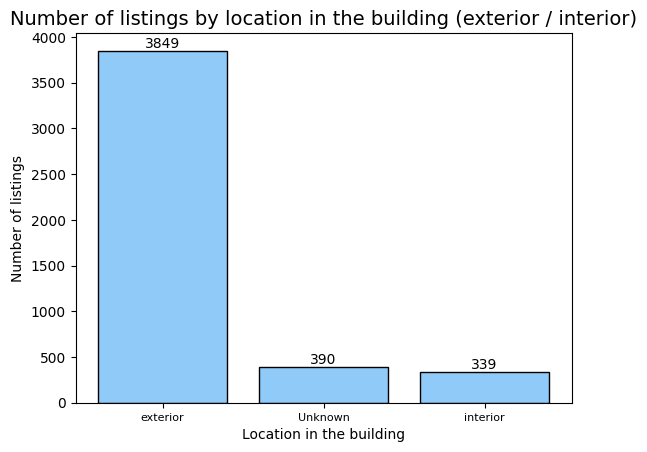

In [48]:
location_counts = df['Exterior_interior'].value_counts()
bars = plt.bar(location_counts.index, location_counts.values, color='#90caf9', edgecolor='#000000')

plt.title('Number of listings by location in the building (exterior / interior)', fontsize=14)
plt.xlabel('Location in the building', fontsize=10)
plt.ylabel('Number of listings', fontsize=10)
plt.bar_label(bars)
plt.xticks(size='8')
plt.show()

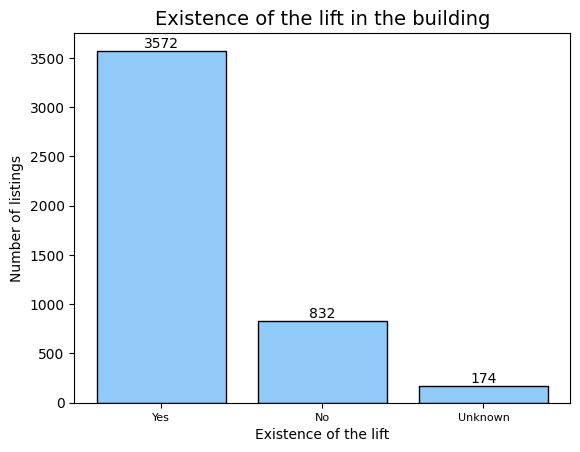

In [49]:
lift_counts = df['Lift'].value_counts()
bars = plt.bar(lift_counts.index, lift_counts.values, color='#90caf9', edgecolor='#000000')

plt.title('Existence of the lift in the building', fontsize=14)
plt.xlabel('Existence of the lift', fontsize=10)
plt.ylabel('Number of listings', fontsize=10)
plt.bar_label(bars)
plt.xticks(size='8')
plt.show()

### Bivariate analysis

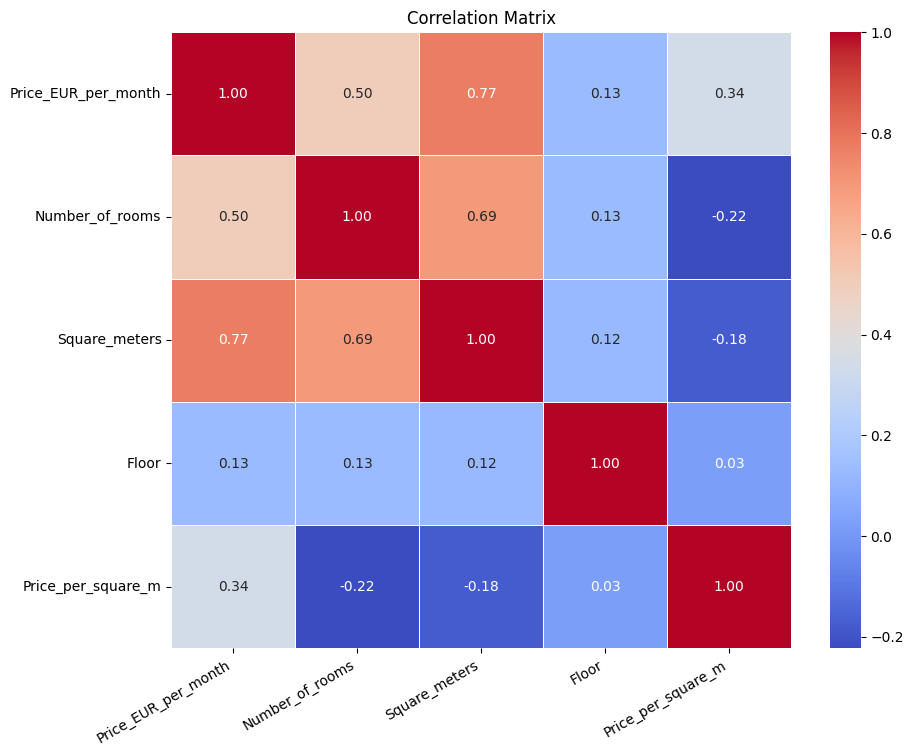

In [50]:
#Defining columns for the correlation matrix
columns_of_interest = ['Price_EUR_per_month', 'Number_of_rooms', 'Square_meters', 'Floor', "Price_per_square_m"]

#Plotting the matrix
correlation_matrix = df[columns_of_interest].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

<code style="color: #9900FF">Main correlation: Price vs square meters.
Strong correlation: square meters vs number of rooms.</code>

In [51]:
corr = df['Price_EUR_per_month'].corr(df['Square_meters'], method='spearman')
print(f"Spearman's rank correlation coefficient: {round(corr, 2)}")

Spearman's rank correlation coefficient: 0.71


### Price distribution per neighourhood

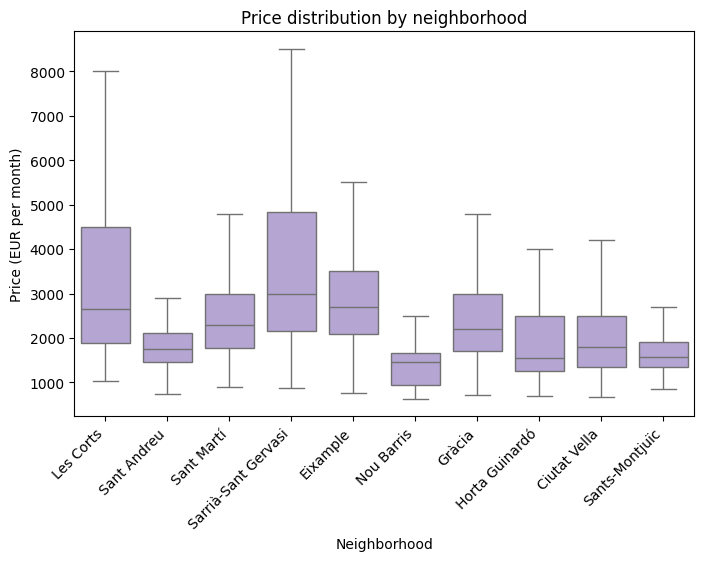

Neighbourhood_main
Nou Barris             1552.71
Sants-Montjuïc         1657.57
Sant Andreu            1782.45
Ciutat Vella           2333.02
Horta Guinardó         2620.33
Gràcia                 2651.77
Sant Martí             2658.43
Eixample               3203.49
Sarrià-Sant Gervasi    4259.25
Les Corts              4318.23
Name: Price_EUR_per_month, dtype: float64


In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Neighbourhood_main'], y=df['Price_EUR_per_month'], showfliers=False, color = "#b39ddb")

plt.xlabel('Neighborhood')
plt.ylabel('Price (EUR per month)')
plt.title('Price distribution by neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

mean_price_per_neighbourhood = df.groupby('Neighbourhood_main')['Price_EUR_per_month'].mean()
sorted_price_per_neighbourhood = mean_price_per_neighbourhood.sort_values()
print(round(sorted_price_per_neighbourhood, 2))

<code style="color: #9900FF">The analysis of price per neighbourhood shows that the most expensive neighbourhood is Les Corts, while Nou Barris is the cheapest. However, there are the fewest apartments available in Nu Barris, which could be responsible for this result. Also, it can be seen that the prices are skewed, most o the apartments fall in the lower range and there are some apartments that are much more expensive, increasing the average price.</code>

### Price per square meter by neighbourhood

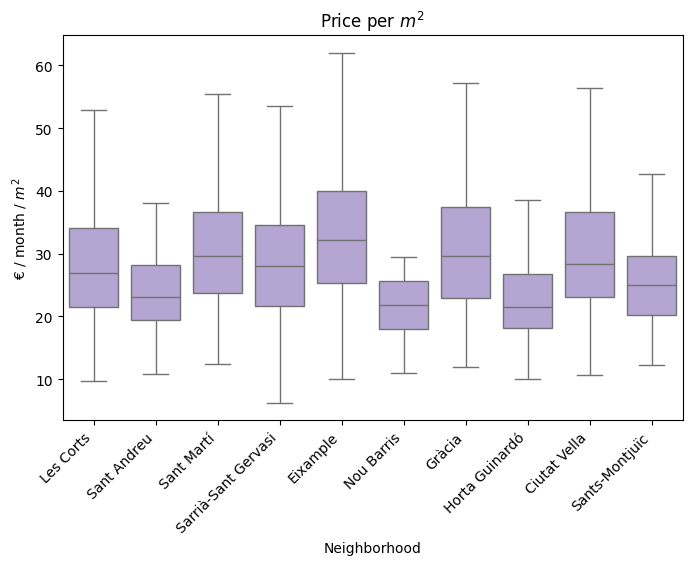

Neighbourhood_main
Horta Guinardó         22.85
Nou Barris             24.20
Sants-Montjuïc         26.45
Sant Andreu            26.65
Sarrià-Sant Gervasi    29.37
Les Corts              30.27
Gràcia                 31.36
Ciutat Vella           32.00
Sant Martí             32.77
Eixample               35.23
Name: Price_per_square_m, dtype: float64


In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Neighbourhood_main'], y=df['Price_per_square_m'], showfliers=False, color = "#b39ddb")

plt.xlabel('Neighborhood')
plt.ylabel('€ / month / $m^2$')
plt.title('Price per $m^2$')
plt.xticks(rotation=45, ha='right')
plt.show()

mean_price_per_neighbourhood = df.groupby('Neighbourhood_main')['Price_per_square_m'].mean()
sorted_price_per_neighbourhood = mean_price_per_neighbourhood.sort_values()
print(round(sorted_price_per_neighbourhood, 2))

<code style="color: #9900FF">The analysis of price per square meter in different neighbourhoods shows that Horta Guinardó is the cheapest while Eixample is the most expensive.</code>

### Property size by neighbourhood

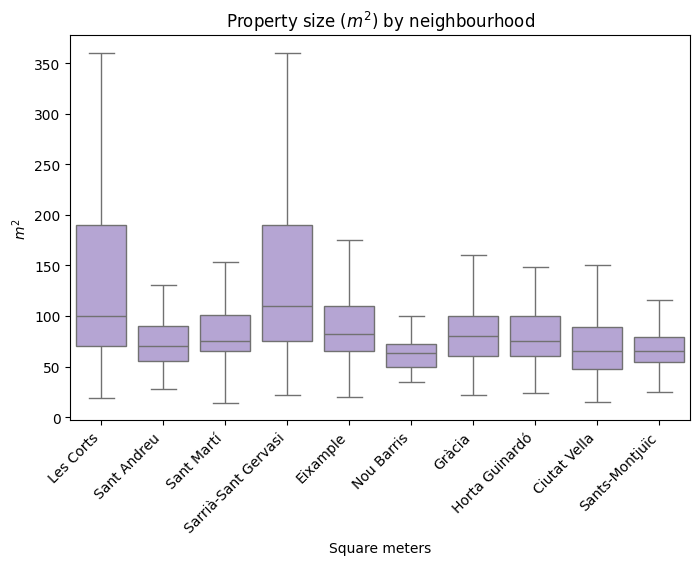

Neighbourhood_main
Nou Barris              65.35
Sants-Montjuïc          67.90
Ciutat Vella            75.04
Sant Andreu             77.00
Sant Martí              88.16
Gràcia                  88.63
Eixample                96.79
Horta Guinardó         108.45
Sarrià-Sant Gervasi    156.91
Les Corts              161.63
Name: Square_meters, dtype: float64


In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Neighbourhood_main'], y=df['Square_meters'], showfliers=False, color = "#b39ddb")

plt.xlabel('Square meters')
plt.ylabel('$m^2$')
plt.title('Property size ($m^2$) by neighbourhood')
plt.xticks(rotation=45, ha='right')
plt.show()

mean_price_per_neighbourhood = df.groupby('Neighbourhood_main')['Square_meters'].mean()
sorted_price_per_neighbourhood = mean_price_per_neighbourhood.sort_values()
print(round(sorted_price_per_neighbourhood, 2))

### Saving the cleaned dataset

In [55]:
df.to_csv('Property_data_cleaned.csv', index=False)